# 1 Project Overview

## 1.0 Executive Summary
My company is desirous in venturing into a new  airline operations business for commercial and private use. The business model targets regional short haul scheduled commercial flights as well as private charters. The financial investment for this project is huge, and significant analysis of the opportunities, risks and returns will need to be undertaken to determine technical, financial and commercial viability.This will require multiple analyses with multiple data sets and models to determine market opportunities in different regions, competitor analysis, profitability and return on investment(ROI), technical risks to name but a few. My role in this multi-disciplinary endeavor is to perform an analysis of potential risks associated with different aircraft makes and models in order to determine the safest models in the market and make a recommendation to the head of the aviation department on the make and models to consider for this investment. 

## 1.1 Industry Overview
The airline industry is one of the riskiest businesses in the world. It requires significant capital outlays due to the huge fixed costs of acquiring equipment, huge maintenance costs to comply with the stringent safety standards, landing fees, parking and hanger costs; airline businesses also have to contend with strong labor unions and the cost of the main commodity - fuel and oil is affected negatively by various geopolitical factors. 

This cannot be articulated better than this statement by Warren Buffet. _" The worst sort of business is one that grows rapidly, requires significant capital to engender the growth, and then earns little or no money. Think airlines. Here a durable competitive advantage has proven elusive ever since the days of the Wright Brothers. Indeed, if a farsighted capitalist had been present at Kitty Hawk, he would have done his successors a huge favor by shooting Orville down"._
Kitty Hawk, North Craolina is where, after 4 years of scientific experimentation, Wilbur and Orville Wright achieved the first successful airplane flight on December 17, 1903.

However, with strategic cost cutting measures and  a customer centric business model, some airlines have achieved success where others have failed. Our company is studying the Southwest Airlines model, one of the most success airline businesses in the USA. Founded in 1967 with the idea of providing affordable air travel to people who otherwise couldn't afford it,Southwest Airlines has a unique business model that is based on keeping costs low. They do this by flying only one type of plane, which makes maintenance and training easier, and by using a point-to-point system instead of a hub-and-spoke model, which reduces the need for expensive airport infrastructure. The point-to point system means they are able to offer flights for shorter routes with very few connecting flights. Their customer centric culture and speed of execution (eg. pilots helping in bag and cabin clearance) ensures quick plane turn around, more revenue and reduced costs. This is the model my company seeks to emurate and my task is to recommend the safest aircraft(s) for deployment.




# 2. The Data 

## 2.0 The Data Set
For my analysis, I will use the National Transportation Safety Board(NTSB) aviation accident database that contains information from 1948 to 2023 about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

This data has documented details about aviation accidents and incidents by flight, make and model. It has further given details about the circumstances around each incident:-stage of flight, extent of damage, latitude and longitude,purpose of flight, fatalities and injuries,weather conditions, as well as characteristics of the aircraft:- make and model, number and type of engine amongst other details. There is also a flight report provided. One of the main weakness in this data set are missing or inconclusive values in some critical columns such as the report status which details if the accident was caused by pilot error or by technical factors. However, because this is a fairly large database, a sample of the data is still big enough to give reasobale conclusions of the relative safety between various makes and models and the relationship between safety with other factors such as type and number of engines.

In my analysis, I will use the CRISP-DM methodology and employ various Python libraries like Pandas, Numpy, Matplotlib and Seaborn for data analysis, data cleaning and visualization. I will further make use of Tableau to present the visualization in an interactive dashboard format and publish my work in a GitHub repository. 

## 2.1 The Problem Statement
Use the above database to analyze different aircraft makes and models accident history in order to provide recommendations to my company on the best make/model (s) for our proposed airline business. Also identify gaps in the data that may limit this analysis and propose a way forward to address those gaps.

## 2.2 Metric of Success
Provide three solid recommendations to the Head of aviation to aid in the critical decision of which are the safest airplane makes/models to use in the proposed business and justify my recomendations using data and visualizations.

# 3. Understanding the Data

In [1]:
# import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the AviationData.csv as a DataFrame and display the first 5 rows
df = pd.read_csv("AviationData.csv",encoding="latin-1",low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# displaying the last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
#checking column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
#checking the shape of the Data (rows, columns)
df.shape


(88889, 31)

## 4. Data Frame Summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The data has significant missing values in the folowing columns: Latitude, Longitude, Airport.Name, Aircraft.Category,FAR.Description,Schedule, Air.Carrier. These columns do not have any significant impact to our safety analysis and can be dropped.


In [7]:
# Descriptive statistics of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


The number.of.Engines column seems to have erroneous data, as it is not possible to have zero engines. I will use the outlier method to filter out that data. 

In [8]:
# Getting statistical summary of the categorical columns
df.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,CEN22FA424,2
Event.Date,88889,14782,1982-05-16,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25589,332739N,19
Longitude,34373,27154,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240


The date column is critical in our analysis and will be converted to date format. 

## 5. Data Cleaning
Now that we have understood the data structure, types we can now go ahead and clean the data so that we can perform Explorative Data Analysis.

In [9]:
# Making a copy of the DataFrame before we clean
df1 = df.copy(deep= True)
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 5.1 Validity Challenges

This procedure will drop irrelevant columns, clean up the column names and also certain values in the data

In [10]:
# Procedure 1: Dropping irrevant Data Observations.
# Data Cleaning Action: Dropping the following columns: Latitude, Longitude, Airport.Code, Airport.Name, 
#Registration.Number,FAR.Description,Schedule, Air.Carrier,Aircraft.Category,Publication.Date
# Explanation: Columns have too many missing values and are not necessary for our safety analysis

# dropping columns
df1.drop(['Latitude','Longitude','Airport.Code','Airport.Name','Aircraft.Category',
          'Registration.Number','FAR.Description','Schedule','Air.carrier','Publication.Date'] ,axis=1, inplace=True)
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [11]:
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [12]:
# Procedure 2 : Drop the "." from column names
df1.columns=df1.columns.str.replace(".","")
df1

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,InjurySeverity,Aircraftdamage,Make,Model,...,NumberofEngines,EngineType,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Broadphaseofflight,ReportStatus
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [13]:
df1.columns

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'InjurySeverity', 'Aircraftdamage', 'Make',
       'Model', 'AmateurBuilt', 'NumberofEngines', 'EngineType',
       'Purposeofflight', 'TotalFatalInjuries', 'TotalSeriousInjuries',
       'TotalMinorInjuries', 'TotalUninjured', 'WeatherCondition',
       'Broadphaseofflight', 'ReportStatus'],
      dtype='object')

In [14]:
# Procedure 3: Replace the various 'Fatal()' to 'Fatal' in the 'InjurySeverity' column for ease of analysis; the information 
# provided inside the brackets can be found in the 'TotalFatalInjuries' column.
# Find the unique values
df1['InjurySeverity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [15]:
# Replace 'Fatal()' to 'Fatal'
df1['InjurySeverity'].replace(['Fatal(2)', 'Fatal(4)', 'Fatal(3)','Fatal(1)', 
       'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal(80)',
       'Fatal(217)', 'Fatal(169)', 'Fatal(88)', 'Fatal(19)', 'Fatal(60)',
       'Fatal(113)', 'Fatal(143)', 'Fatal(83)', 'Fatal(24)', 'Fatal(44)',
       'Fatal(64)', 'Fatal(92)', 'Fatal(118)', 'Fatal(265)', 'Fatal(26)',
       'Fatal(138)', 'Fatal(206)', 'Fatal(71)', 'Fatal(21)', 'Fatal(46)',
       'Fatal(102)', 'Fatal(115)', 'Fatal(141)', 'Fatal(55)',
       'Fatal(121)', 'Fatal(45)', 'Fatal(145)', 'Fatal(117)',
       'Fatal(107)', 'Fatal(124)', 'Fatal(49)', 'Fatal(154)', 'Fatal(96)',
       'Fatal(114)', 'Fatal(199)', 'Fatal(89)', 'Fatal(57)'], 'Fatal',inplace=True)

In [16]:
df1['InjurySeverity'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: InjurySeverity, dtype: int64

In [17]:
# Procedure 4: Replace 'Incident',Minor'and 'Serious'to 'Non-Fatal', since they are pretty small numbers.
df1['InjurySeverity'].replace(['Incident','Minor','Serious'],'Non-Fatal',inplace=True)


In [18]:
df1['InjurySeverity'].value_counts()

Non-Fatal      69967
Fatal          17826
Unavailable       96
Name: InjurySeverity, dtype: int64

In [19]:
df1.sample(5)

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,InjurySeverity,Aircraftdamage,Make,Model,...,NumberofEngines,EngineType,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Broadphaseofflight,ReportStatus
56806,20040707X00913,Accident,ATL04CA127,2004-06-06,"DECATUR, AL",United States,Non-Fatal,Substantial,Cessna,150,...,1.0,Reciprocating,Personal,NaN,NaN,1.0,NaN,VMC,Maneuvering,Probable Cause
24141,20001213X29468,Accident,NYC89DFA02,1989-09-28,"MARCY, NY",United States,Fatal,Destroyed,Niedzielski,COOT-A,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause
42647,20001208X08829,Accident,FTW97FA340,1997-09-07,"MONTROSE, CO",United States,Fatal,Destroyed,Cessna,182N,...,1.0,Reciprocating,Personal,3.0,1.0,0.0,0.0,VMC,Climb,Probable Cause
83000,20190331X20824,Accident,WPR19FA103,2019-03-31,"Farmington, NM",United States,Fatal,Destroyed,Cirrus,SR22,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,NaN,The noninstrument-rated pilot's continued visu...
80506,20170824X14615,Accident,GAA17CA507,2017-08-24,"Hillsboro, OR",United States,Non-Fatal,Substantial,CUB CRAFTERS INC,CC11 100,...,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,NaN,The student pilots failure to maintain airpla...


In [20]:
df1['Make'].value_counts().nlargest(20)

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  2134
Boeing                1594
BOEING                1151
Grumman               1094
Mooney                1092
BEECH                 1042
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
BELL                   588
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Name: Make, dtype: int64

In [21]:
# Procedure 5
# Replace CESSNA with Cessna, PIPER with Piper and BEECH with Beech and BELL with 'Bell,BOEING with Boeing' etc for the makes with high numbers

df1['Make'].replace({'CESSNA':'Cessna','PIPER':'Piper','BEECH':'Beech','BELL':'Bell','BOEING':'Boeing',
 'ROBINSON HELICOPTER':'Robinson','ROBINSON HELICOPTER COMPANY' :'Robinson','MOONEY':'Mooney','MAULE':'Maule',
'AIR TRACTOR INC':'Air Tractor','HUGHES':'Hughes','AERONCA':'Aeronca','EUROCOPTER':'Eurocopter','SCHWEIZER':'Grumman-schweizer',
'STINSON':'Stinson','LUSCOMBE':'Luscombe','DEHAVILLAND':'De Havilland','CHAMPION':'Champion','GRUMMAN':'Grumman-schweizer',
 'AERO COMMANDER':'Aero Commander','BELLANCA':'Bellanca','NORTH AMERICAN':'North American','AVIAT AIRCRAFT INC':'Aviat',
 'ROBINSON':'Robinson','CIRRUS DESIGN CORP':'Cirrus','TAYLORCRAFT':'Taylorcraft','AIRBUS':'Airbus',
  'GRUMMAN ACFT ENG COR-SCHWEIZER':'Grumman-schweizer','Cirrus Design Corp.':'Cirrus','Ercoupe (eng & Research Corp.)':'Ercoupe',
    'DIAMOND AIRCRAFT IND INC':'Diamond'}, inplace=True)
df1['Make'].value_counts()

Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
                     ...  
Jasper                   1
MILLER RAYMOND A         1
MATHIS MELVIN R          1
Aeronca/bubeck           1
FETTERMAN LANNY R        1
Name: Make, Length: 8206, dtype: int64

## 5.2 Completeness Challenges

In [22]:
# Procedure 1: Checking for missing values
df1.isnull().sum()

EventId                     0
InvestigationType           0
AccidentNumber              0
EventDate                   0
Location                   52
Country                   226
InjurySeverity           1000
Aircraftdamage           3194
Make                       63
Model                      92
AmateurBuilt              102
NumberofEngines          6084
EngineType               7077
Purposeofflight          6192
TotalFatalInjuries      11401
TotalSeriousInjuries    12510
TotalMinorInjuries      11933
TotalUninjured           5912
WeatherCondition         4492
Broadphaseofflight      27165
ReportStatus             6381
dtype: int64

In [23]:
#The data has  missing values in almost all columns. 
# Procedure 2: For columns where missing values are less than 1000 I will drop the rows with NaN Values.
df1.dropna(subset=['Location','Country','Make','Model','AmateurBuilt','InjurySeverity'],inplace=True)

In [24]:
df1.isnull().sum()

EventId                     0
InvestigationType           0
AccidentNumber              0
EventDate                   0
Location                    0
Country                     0
InjurySeverity              0
Aircraftdamage           2639
Make                        0
Model                       0
AmateurBuilt                0
NumberofEngines          5212
EngineType               6136
Purposeofflight          5132
TotalFatalInjuries      11299
TotalSeriousInjuries    12378
TotalMinorInjuries      11797
TotalUninjured           5813
WeatherCondition         3480
Broadphaseofflight      25991
ReportStatus             5442
dtype: int64

In [25]:
# Procedure 3: for categorical columns  I will replace the NaN Values with the top frequency value from the <df.describe
#(include='O').T> ;for numerical columns I will replace the NaN Values with the 50 Percentile Value from the <df.describe().T> 

df1.fillna({'Aircraftdamage':'Substantial','EngineType':'Reciprocating','Purposeofflight':'Personal','WeatherCondition':'VMC',
               'Broadphaseofflight':'Landing','ReportStatus':'Probable Cause','NumberofEngines':1,'TotalFatalInjuries':0,
        'TotalSeriousInjuries':0,'TotalMinorInjuries':0,'TotalUninjured':1 },inplace=True)

df1.isnull().sum()

EventId                 0
InvestigationType       0
AccidentNumber          0
EventDate               0
Location                0
Country                 0
InjurySeverity          0
Aircraftdamage          0
Make                    0
Model                   0
AmateurBuilt            0
NumberofEngines         0
EngineType              0
Purposeofflight         0
TotalFatalInjuries      0
TotalSeriousInjuries    0
TotalMinorInjuries      0
TotalUninjured          0
WeatherCondition        0
Broadphaseofflight      0
ReportStatus            0
dtype: int64

### 5.3 Uniformity Challenges

In [26]:
# Procedure 1: Convert all columns to Camel Case for uniformity

df1.rename(columns={'Aircraftdamage':'AircraftDamage','NumberofEngines':'NumberOfEngines',
                    'Purposeofflight':'PurposeOfFlight','Broadphaseofflight':'BroadPhaseOfFlight'},inplace=True)
df1.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,InjurySeverity,AircraftDamage,Make,Model,...,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,Cessna,501,...,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


### 5.4 Checking for Duplicates

In [27]:
# Checking for duplicates
df1.duplicated().sum()

1

In [28]:
#drop the duplicates
df1.drop_duplicates(inplace=True)

#check
df1.duplicated().sum()

0

### 5.5 Checking for outliers

In [29]:
# Checking the statistics of the numerical columns
df1.describe().T

# It makes sense to have the min and max values indicated below for fatal and non-fatal injuries;
# However having 0 engines does not make sense; 

,count,mean,std,min,25%,50%,75%,max
NumberOfEngines,87426.0,1.134422,0.429726,0.0,1.0,1.0,1.0,8.0
TotalFatalInjuries,87426.0,0.564409,5.118530,0.0,0.0,0.0,0.0,349.0
TotalSeriousInjuries,87426.0,0.242376,1.437184,0.0,0.0,0.0,0.0,161.0
TotalMinorInjuries,87426.0,0.312253,2.098541,0.0,0.0,0.0,0.0,380.0
TotalUninjured,87426.0,5.068149,27.059143,0.0,0.0,1.0,2.0,699.0


<AxesSubplot:ylabel='NumberOfEngines'>

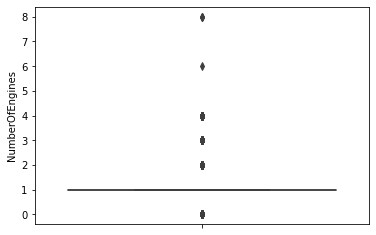

In [30]:
# Checking for outlier
sns.boxplot(data=df1, y='NumberOfEngines')

In [31]:
# Remove the outlier using the min quantile
min_eng = df1['NumberOfEngines'].quantile(.0005)
min_eng

0.0

In [32]:
df1[df1['NumberOfEngines']<= min_eng]

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,InjurySeverity,AircraftDamage,Make,Model,...,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus
62,20020917X02247,Accident,LAX82DVG13,1982-01-09,"CALISTOGA, CA",United States,Non-Fatal,Substantial,Schleicher,ASW 20,...,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
247,20020917X02190,Accident,LAX82DA098,1982-02-06,"GLENDALE, AZ",United States,Non-Fatal,Substantial,Raven,S-55A,...,0.0,Unknown,Personal,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause
353,20020917X02298,Accident,LAX82FUJ28,1982-02-19,"PHOENIX, AZ",United States,Non-Fatal,Substantial,Balloon Works,FIREFLY,...,0.0,Unknown,Personal,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause
433,20020917X01824,Accident,CHI82DA076,1982-02-27,"CINCINNATI, OH",United States,Non-Fatal,Substantial,Barnes,FIREFLY-7,...,0.0,Unknown,Personal,0.0,1.0,1.0,2.0,VMC,Takeoff,Probable Cause
436,20020917X02181,Accident,LAX82DA089,1982-02-28,"NAPA, CA",United States,Non-Fatal,Destroyed,Barnes,BALLOON AX7,...,0.0,Unknown,Unknown,0.0,0.0,1.0,4.0,VMC,Landing,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88322,20220808105678,Accident,CEN22LA363,2022-08-07,"Waller, TX",United States,Non-Fatal,Substantial,SCHLEICHER,ASW-20B,...,0.0,NONE,Personal,0.0,0.0,0.0,1.0,VMC,Landing,The pilots failure to maintain the proper des...
88462,20220912105904,Accident,ERA22LA407,2022-09-03,"Mount Bethel, PA",United States,Non-Fatal,Substantial,Grumman-schweizer,SGS 2-33A,...,0.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,Landing,Probable Cause
88476,20221004106058,Accident,WPR22LA368,2022-09-04,"Las Cruces, NM",United States,Non-Fatal,Substantial,Firefly Balloons,Firefly 8B-15,...,0.0,Reciprocating,Personal,0.0,0.0,1.0,2.0,VMC,Landing,The pilots failure to maintain the proper des...
88596,20221003106045,Accident,WPR22LA364,2022-09-29,"Hood River, OR",United States,Non-Fatal,Substantial,SCHLEICHER,ASW-20,...,0.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause


In [33]:
# Remove the outliers
df1= df1[df1['NumberOfEngines']> min_eng]

<AxesSubplot:ylabel='NumberOfEngines'>

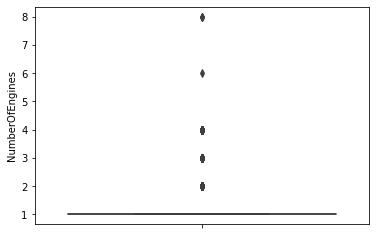

In [34]:
# Confirm removal of outliers
sns.boxplot(data=df1, y='NumberOfEngines')

### 5.6 Feature Engineering
For better analysis of the data I will create additional columns and filter out certain rows as explained below:

**ReportStatus**: This column contains string type data explaining the reason for the accident; going through the data, one realizes that most accidents are due to pilot error and not technical issues. There are also significant number of accidents that are reportyed as 'probable cause'.This means that that data has not been filled in. I will create a new column where if a string contains the name 'Pilot' this will be classified as 'Pilot Error'. If string contains 'Probable Cause' classify as 'Undetermined'  else classify as 'Technical Failure'. 

**Location** : Create a new column 'State' by filtering out the last two elements (state codes)

**SurvivalRate**: Create a new Column whosae value is TotalUninjured +TotalSeriousInjuries+TotalMinorInjuries divided by TotalUninjured +TotalSeriousInjuries+TotalMinorInjuries+TotalFatalInjuries

**EventDate**: The column is currently in str format; convert column to date format for time bassed analysis

**Investigation Type** Remove rows that contain 'incident'. These are immaterial and I want my analysis to focus on accidents only; i.e. apples for apples

**Countries** Remove countries that are non-US, because they are immaterial and the contain incomplete data.


In [35]:
df1['ReportStatus'].unique()

array(['Probable Cause', 'Factual', 'Foreign', ...,
       'The pilot did not ensure adequate clearance from construction vehicles during taxi.',
       'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.',
       'The pilot\x92s loss of control due to a wind gust during landing.'],
      dtype=object)

In [36]:
# create a copy of the dataframe before subsetting
df2 = df1.copy()

In [37]:
# Create a new column summarizing the ReportStatus column

m1 = df2['ReportStatus'].str.contains('pilot')
m2 = df2['ReportStatus'].str.contains('Probable Cause')
m3 = df2['ReportStatus'].str.contains('Factual')
m4 = df2['ReportStatus'].str.contains('Foreign')

df2['AccidentCause'] = np.select(condlist=[m1,m2,m3,m4],choicelist=['Pilot Error','Unknown','Unknown','Unknown'])
df2['AccidentCause'].value_counts()       

Unknown        67969
Pilot Error    13209
0               5028
Name: AccidentCause, dtype: int64

In [38]:
# In the new column created replace '0' with 'Technical Failure'

df2['AccidentCause'].replace('0','Technical Failure', inplace=True)
df2['AccidentCause'].value_counts()

Unknown              67969
Pilot Error          13209
Technical Failure     5028
Name: AccidentCause, dtype: int64

In [39]:
# Combine Make and Model columns into a new column MakeModel
# df1['MakeModel'] = df1[['Make','Model']].agg(' '.join, axis=1)

In [40]:
#df1['MakeModel'].value_counts()

In [41]:
# Create a new column called State by extracting the last 2 string values that represent the State codes.
df2['State'] = df2['Location'].str[-2:]

In [42]:
df2['State'].replace({'ID':'Idaho', 'CA':'California', 'VA':'Virginia', 'OH':'Ohio', 'MA':'Massachusetts', 'MN':'Minnesota', 
        'WA':'Washington', 'NJ':'New Jersey', 'FL':'Florida', 'NM':'New Mexico', 'AL':'Alabama',  'LA':'Louisiana',
        'TX':'Texas', 'OK':'Oklahoma', 'AR':'Arkansas', 'UT':'Utah', 'AK':'Alaska', 'PA':'Pennsylvania', 'MI':'Michigan',
        'GA':'Georgia', 'NC':'North Carolina', 'NY':'New York', 'MT':'Montana', 'OR':'Oregon', 'NV':'Nevada', 'IN':'Indiana',
        'AZ':'Arizona', 'MO':'Missouri', 'WY':'Wyoming', 'IL':'Illinois', 'SC':'South Carolina', 'MD':'Maryland', 'HI':'Hawaii',
       'CO':'Colorado', 'WV':'West Virginia', 'MS':'Mississippi', 'DC':'Washington DC', 'VT':'Vermont', 'KS':'Kansas', 
        'NH':'New Hampshire', 'IA':'Iowa', 'WI':'Wisconsin', 'KY':'Kentucky', 'CT':'Connecticut','TN':'Tennessee', 'ME':'Maine', 
        'AN':'Non US', 'SD':'South Dakota', 'NE':'Nebraska', 'RI':'Rhode Island', 'ND':'North Dakota', 'LK':'Non US', 
        '89':'Non US', 'BO':'Non US', 'DE':'Delaware','as':'Non US', 'FT':'Non US', 'AS':'American Samoa', '82':'Non US', 
        'la':'Non US', 'PR':'Puerto Rico', 'Of':'Non US', 'EN':'Non US', '95':'Non US', 'OA':'Non US', '98':'Non US',
       'da':'Non US', 'ia':'Non US', 'co':'Non US', 'NG':'Non US', 'es':'Non US', 'nd':'Non US', 'CE':'Non US', 'NA':'Non US', 
        'EA':'Non US', 'ES':'Non US', 'DA':'Non US', 'GU':'Guam', 'ny':'Non US', 'om':'Non US', 'DS':'Non US', 'ds':'Non US',
        'ca':'Non US', 'ue':'Non US', 'an':'Non US', 'oa':'Non US', 'na':'Non US', 'ay':'Non US', 'ma':'Non US', 'PO':'Pacific Ocean',
        'al':'Non US',  'ic':'Non US', 'me':'Non US', '74':'Non US', 'O6':'Non US', 'GO':'Non US', 'ze':'Non US', 'IC':'Non US', 
        'ZE':'Non US', 'ce':'Non US', 'ti':'Non US', 'ea':'Non US', 'en':'Non US', 'os':'Non US', '1A':'Non US', 'il':'Non US', 
        'us':'Non US', 'ya':'Non US', 'or':'Non US', 'BA':'Non US','ba':'Non US', 'ly':'Non US', 'go':'Non US', '67':'Non US',
        'RK':'Non US', 'OM':'Non US', '34':'Non US','in':'Non US', 'ey':'Non US', 'UA':'Non US', 'TI':'Non US', 'ta':'Non US',
         'on':'Non US', 'ru':'Non US', 'UE':'Non US', 'GM':'Gulf of mexico', '20':'Non US', 'RU':'Non US', 'LE':'Non US', 
        'rk':'Non US', 'US':'Non US', 'um':'Non US', 'AY':'Non US', 'li':'Non US', 'le':'Non US', 'PT':'Non US', 'OF':'Non US',
        'LY':'Non US', 'ua':'Non US', 're':'Non US', 'we':'Non US', 'EY':'Non US', 'pt':'Non US', 'er':'Non US', 'ji':'Non US',
        '16':'Non US','ST':'Non US', 'pe':'Non US', 'AO':'Atlantic Ocean', 'am':'Non US', 'YA':'Non US', 'UN':'Non US', 
        'VI':'Virgin Islands', 'el':'Non US', 'IS':'Non US', 'ne':'Non US', 'ry':'Non US', 'SH':'Non US', 'aq':'Non US',
        'ar':'Non US', 'PE':'Non US', 'wi':'Non US', 'wn':'Non US', 'f)':'Non US', 'n,':'Non US', 'VI':'Virgin Islands', 
        'el':'Non US', 'IS':'Non US', 'ne':'Non US', 'ry':'Non US', 'SH':'Non US', 'aq':'Non US', 'ar':'Non US', 
        'PE':'Non US', 'wi':'Non US', 'wn':'Non US', 'f)':'Non US', 'n,':'Non US','i,':'Non US', 'ni':'Non US', 'au':'Non US', 
        '9,':'Non US', 'e)':'Non US',  ',':'Non US', 'ao':'Non US', 'my':'Non US', '8,':'Non US', 'a)':'Non US', 'o,':'Non US',
       'd,':'Non US', 'A,':'Non US', 'x,':'Non US', 'rg':'Non US', 'g,':'Non US', 's,':'Non US', 'e,':'Non US', 'C,':'Non US',
        'pa':'Non US', 'a,':'Non US', 'ka':'Non US', 'sh':'Non US', 'ad':'Non US', 'H,':'Non US', 'm,':'Non US', 'y,':'Non US', 
        'of':'Non US', 'ng':'Non US', '7,':'Non US', 'h)':'Non US', 'O,':'Non US', 'CB':'Non US'}, inplace= True)

In [43]:
df2['State'].unique()

array(['Idaho', 'California', 'Virginia', 'Ohio', 'Massachusetts',
       'Minnesota', 'Washington', 'New Jersey', 'Florida', 'New Mexico',
       'Alabama', 'Louisiana', 'Texas', 'Oklahoma', 'Arkansas', 'Utah',
       'Alaska', 'Pennsylvania', 'Michigan', 'Georgia', 'North Carolina',
       'New York', 'Montana', 'Oregon', 'Nevada', 'Indiana', 'Arizona',
       'Missouri', 'Wyoming', 'Illinois', 'South Carolina', 'Maryland',
       'Hawaii', 'Colorado', 'West Virginia', 'Mississippi',
       'Washington DC', 'Vermont', 'Kansas', 'New Hampshire', 'Iowa',
       'Wisconsin', 'Kentucky', 'Connecticut', 'Tennessee', 'Maine',
       'Non US', 'South Dakota', 'Nebraska', 'Rhode Island',
       'North Dakota', 'Delaware', 'American Samoa', 'Puerto Rico',
       'Guam', 'Pacific Ocean', 'Gulf of mexico', 'Atlantic Ocean',
       'Virgin Islands', ', '], dtype=object)

In [44]:
df2.sample(3)

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,InjurySeverity,AircraftDamage,Make,Model,...,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,AccidentCause,State
78845,20160906X03328,Accident,ERA16WA310,2016-08-25,"Eleuthera, Bahamas",Bahamas,Non-Fatal,Substantial,LEARJET,55,...,Personal,0.0,0.0,0.0,9.0,VMC,Landing,Probable Cause,Unknown,Non US
48614,20001212X21327,Incident,SEA00IA108,2000-06-17,"SEATTLE, WA",United States,Non-Fatal,Substantial,Douglas,DC-8-73,...,Unknown,0.0,0.0,0.0,5.0,VMC,Cruise,Probable Cause,Unknown,Washington
6616,20001214X44755,Accident,ATL84LA027,1983-10-21,"ARLINGTON, TN",United States,Non-Fatal,Substantial,Piper,J5A,...,Ferry,0.0,0.0,2.0,0.0,IMC,Takeoff,Probable Cause,Unknown,Tennessee


In [45]:
# Create SurvivalRate column
survivors= df2[['TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured']].sum(axis=1) 
Passengers = df2[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured']].sum(axis=1)
df2['SurvivalRate'] = (survivors.div(Passengers))
df2.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,InjurySeverity,AircraftDamage,Make,Model,...,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,AccidentCause,State,SurvivalRate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown,Idaho,0.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,Unknown,California,0.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,...,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,Unknown,Virginia,0.250000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Unknown,California,0.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,Cessna,501,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,Unknown,Ohio,0.666667


In [46]:
df2.isna().sum()

EventId                  0
InvestigationType        0
AccidentNumber           0
EventDate                0
Location                 0
Country                  0
InjurySeverity           0
AircraftDamage           0
Make                     0
Model                    0
AmateurBuilt             0
NumberOfEngines          0
EngineType               0
PurposeOfFlight          0
TotalFatalInjuries       0
TotalSeriousInjuries     0
TotalMinorInjuries       0
TotalUninjured           0
WeatherCondition         0
BroadPhaseOfFlight       0
ReportStatus             0
AccidentCause            0
State                    0
SurvivalRate            74
dtype: int64

In [47]:
df2=df2.dropna()
df2.isna().sum()

EventId                 0
InvestigationType       0
AccidentNumber          0
EventDate               0
Location                0
Country                 0
InjurySeverity          0
AircraftDamage          0
Make                    0
Model                   0
AmateurBuilt            0
NumberOfEngines         0
EngineType              0
PurposeOfFlight         0
TotalFatalInjuries      0
TotalSeriousInjuries    0
TotalMinorInjuries      0
TotalUninjured          0
WeatherCondition        0
BroadPhaseOfFlight      0
ReportStatus            0
AccidentCause           0
State                   0
SurvivalRate            0
dtype: int64

In [48]:
# delete rows where investigation type is incident
df2['InvestigationType'].value_counts()

Accident    83080
Incident     3052
Name: InvestigationType, dtype: int64

In [49]:
# Create a Boolean mask for the rows to remove
mask = df2['InvestigationType']=='Incident'
# select all rows except the ones that contain 'Incident'
df2=df2[~mask]
df2['InvestigationType'].value_counts()

Accident    83080
Name: InvestigationType, dtype: int64

In [50]:
# delete rows where country is not USA; 
df2['Country'].value_counts()

United States    78670
Brazil             317
Canada             294
Mexico             266
Australia          191
                 ...  
Cote D'ivoire        1
Corsica              1
Eritrea              1
Macao                1
Obyan                1
Name: Country, Length: 199, dtype: int64

In [51]:
# Create a Boolean mask for the rows to remove
mask = df2['Country']=='United States'
# select all rows except the ones that contain 'Incident'
df2=df2[mask]
df2['Country'].value_counts()

United States    78670
Name: Country, dtype: int64

In [52]:
# drop EventId ReportStatus, Location, AccidentNumber Columns

df2.drop(['EventId','InvestigationType','AccidentNumber','Location','ReportStatus'] ,axis=1, inplace=True)
df2.head(3)

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate
0,1948-10-24,United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Unknown,Idaho,0.00
1,1962-07-19,United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Unknown,California,0.00
2,1974-08-30,United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Unknown,Virginia,0.25


In [53]:
# Check date format
df2['EventDate'].dtypes


dtype('O')

In [54]:
#Convert date format 
df2['EventDate'] = pd.to_datetime(df2['EventDate'])
df2['EventDate'].head()

0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: EventDate, dtype: datetime64[ns]

In [55]:
# create a year column
df2['EventYear']= df2['EventDate'].dt.year
df2['EventYear'].dtypes

dtype('int64')

In [56]:
df2.head(3)

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
0,1948-10-24,United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Unknown,Idaho,0.00,1948
1,1962-07-19,United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Unknown,California,0.00,1962
2,1974-08-30,United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Unknown,Virginia,0.25,1974


<AxesSubplot:ylabel='EventYear'>

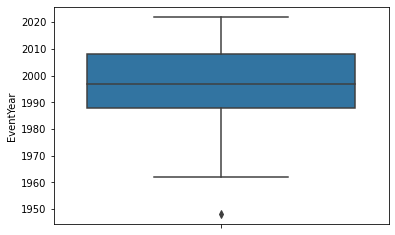

In [57]:
# Checking for outlier in EventYear col
sns.boxplot(data=df2, y='EventYear')

In [58]:
# Remove the outliers using quantile
min_year = df2['EventYear'].quantile(.005)
min_year

1982.0

In [59]:
# display the outlier records
df2[df2['EventYear']< min_year]

# There were only 7 records betwwen 1948 and 1981

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
0,1948-10-24,United States,Fatal,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Unknown,Idaho,0.000000,1948
1,1962-07-19,United States,Fatal,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Unknown,California,0.000000,1962
2,1974-08-30,United States,Fatal,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Unknown,Virginia,0.250000,1974
3,1977-06-19,United States,Fatal,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Unknown,California,0.000000,1977
4,1979-08-02,United States,Fatal,Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Unknown,Ohio,0.666667,1979
5,1979-09-17,United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Personal,0.0,0.0,1.0,44.0,VMC,Climb,Unknown,Massachusetts,1.000000,1979
6,1981-08-01,United States,Fatal,Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Unknown,Minnesota,0.000000,1981


In [60]:
# Remove the outliers
df2= df2[df2['EventYear']>= min_year]
df2.sample(5)

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
81181,2018-02-13,United States,Non-Fatal,Substantial,Grumman-schweizer,269D,No,1.0,Turbo Shaft,Personal,0.0,2.0,0.0,0.0,VMC,Landing,Pilot Error,Michigan,1.000000,2018
88451,2022-09-01,United States,Non-Fatal,Substantial,Boeing,737-824,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,147.0,VMC,Landing,Unknown,Colorado,1.000000,2022
74799,2014-03-08,United States,Fatal,Substantial,ROGERS GEORGE T,LANCAIR IVP,Yes,1.0,Turbo Prop,Personal,3.0,0.0,0.0,0.0,VMC,Landing,Pilot Error,South Carolina,0.000000,2014
57777,2004-11-04,United States,Fatal,Destroyed,Socata,TB 20,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,1.0,VMC,Climb,Unknown,Florida,0.333333,2004
72768,2012-10-13,United States,Non-Fatal,Substantial,Piper,PA-38-112,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Technical Failure,California,1.000000,2012


<AxesSubplot:ylabel='EventYear'>

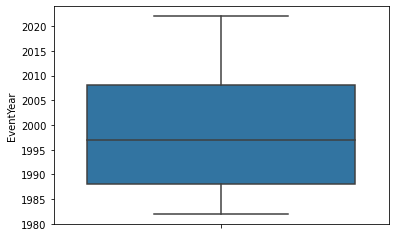

In [61]:
# Confirm removal of outliers
sns.boxplot(data=df2, y='EventYear')

### 5.7 Saving the clean dataset

In [62]:
#save the new dataframe in cvs format
df2.to_csv('AviationData_Clean.csv',index=False)


In [63]:
df2 =df2.copy(deep=True)

The 10 top accident makes comprise of 67% of the data. Statistically, it is safeto assume that these are also the top akes in use in the industry. I will focus my analysis by subsetting a new data frame with the information on these 10 makes only.

## 6 Explorative Data Analysis

I will now proceed to perform univariate, bivariate and multivariate data analysis using summary statistics and visualizations to determine the safest airplane make and model,in the United States. One of the key success factors in the airline business is the reduction of the cost of maintenance. Buying the most commonly used makes and models in the market is just as important as chosing the safest make and model. This will ensure that the company enjoys reduced maintenance costs, due to economies of scale, availability of technical staff to handle the aircraft, cheaper training costs and better re-sale values when upgrading. For that reason I will focus my analysis on the **Top 10 Makes** because they represent **66%** of the data


###### 1. What are the various statistical measures by type (mean,median,max, min). Because the data set contains a lot of models, I will use a sample of the top 20  frequencies by make and assess those for various safety parameters.

##### 2.  Analyze the filtered types of airplanes accident history over time

##### 3. Analyze the chosen airplane types by survival rate, aircraft damage, injury severity and accident cause.

##### 4. Analyze the Correlation between number of accidents and engine size

##### 5. Analyze the geographical distribution of accidents by state

This analysis will be done both on this notebook and in Tableau

In [64]:
# Load the clean dataset and create a new dataframe

data = pd.read_csv('AviationData_Clean.csv')
data


,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
0,1982-01-01,United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Unknown,Washington,1.0,1982
1,1982-01-01,United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Unknown,New Jersey,1.0,1982
2,1982-01-01,United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Unknown,Florida,1.0,1982
3,1982-01-01,United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Unknown,New Mexico,1.0,1982
4,1982-01-01,United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Unknown,Alabama,1.0,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78658,2022-12-21,United States,Non-Fatal,Substantial,Cessna,172F,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Unknown,Michigan,1.0,2022
78659,2022-12-21,United States,Non-Fatal,Substantial,GRUMMAN AMERICAN AVN. CORP.,AA-5B,No,1.0,Reciprocating,Instructional,0.0,1.0,0.0,1.0,VMC,Landing,Unknown,Louisiana,1.0,2022
78660,2022-12-26,United States,Non-Fatal,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Unknown,Maryland,1.0,2022
78661,2022-12-26,United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Unknown,Arizona,1.0,2022


In [65]:
top_10_makes = data['Make'].value_counts().nlargest(10).sum()
top_10_makes

53064

In [66]:
#checking for missing values
data.isna().sum().any()

False

### 6.1 Univariate Analysis

I will use various univariate analysis techniques such as count, plots, histogram and boxplot to analyze a number of key variables that have a firect relationship with safety.
##### 1. Frequency of accidents by Make and MakeModel
##### 2. Frequencyof accidents by year
##### 3, Frequency of Fatal and non-Fatal Accidents 
##### 4. Frequency of accidents based on  number of Engines
##### 5. Frequency of accidents based on Engine Types
##### 6. Main cause of accident
##### 7. Level of damage

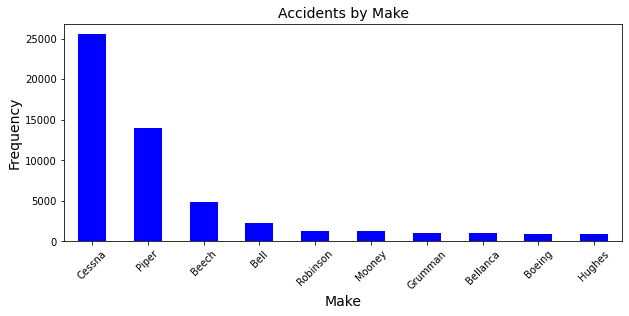

In [67]:
# Top 10 Makes # Frequency of accidents by make
plt.figure(figsize=(10,4))

top_10_makes = data['Make'].value_counts().nlargest(10)

top_10_makes.plot(kind='bar',color='b')

plt.title('Accidents by Make',fontsize=14)
plt.xlabel('Make',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
plt.show()



The top 3 makes with the most accidents are Cessna, Piper and Beech. Grumman, Bellanca Boeing and Hughes have the least number of accidents

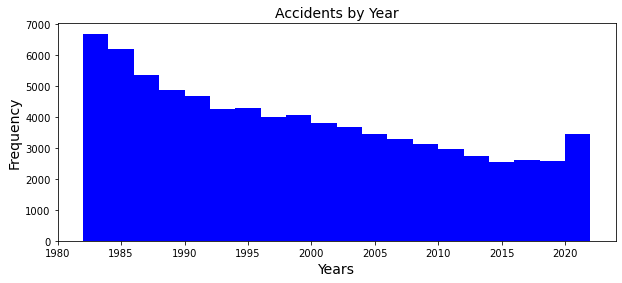

In [68]:
# Frequency of accidents over time
plt.figure(figsize=(10,4))
plt.hist(data['EventYear'],bins=20,color='b')

plt.title('Accidents by Year',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()


The data shows that accidents progressively decreased in frequency with a surprising peak between 2020 and 2023

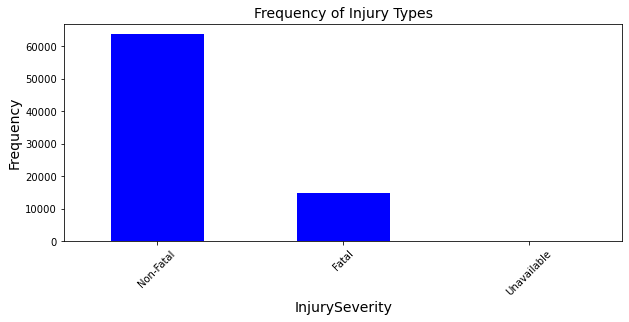

In [69]:
# Frequency of fatal vs non-fatal accidents
Injury_Counts = data['InjurySeverity'].value_counts()

plt.figure(figsize=(10,4))
plt.xlabel('InjurySeverity',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Frequency of Injury Types',fontsize=14)
Injury_Counts.plot(kind='bar',color='b');
plt.xticks(rotation=45)
plt.show()

The data shows that a vast majority of accidents resulted in non-fatal casualties

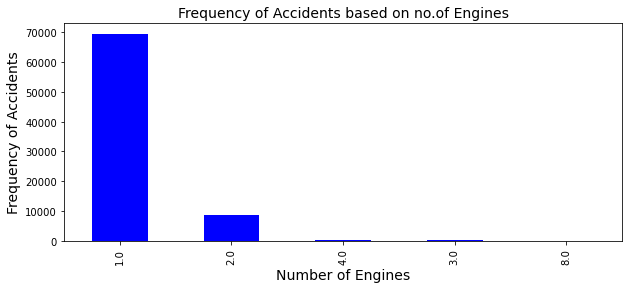

In [70]:
# No.of Engines
No_Engines = data['NumberOfEngines'].value_counts()


plt.figure(figsize=(10, 4))
No_Engines.plot(kind='bar',color='b');
plt.xlabel('Number of Engines',fontsize=14)
plt.ylabel('Frequency of Accidents',fontsize=14)
plt.title('Frequency of Accidents based on no.of Engines',fontsize=14 )
plt.show()

The data shows that the less the number of engines an aircraft has, the higher the likelihood of an accident. Aircraft with over 3 engines are relatively safe.

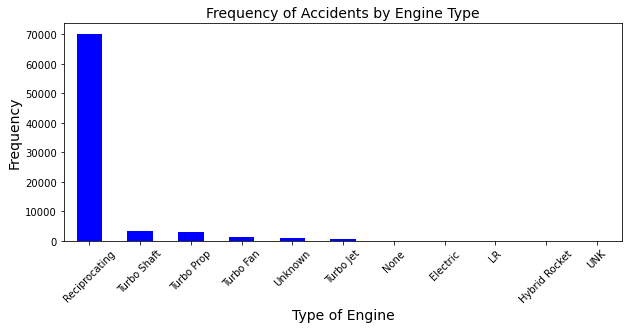

In [71]:
# Engine Types
Engine_Types = data['EngineType'].value_counts()

plt.figure(figsize=(10, 4))
Engine_Types.plot(kind='bar',color='b');
plt.xlabel('Type of Engine',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Frequency of Accidents by Engine Type',fontsize=14)
plt.xticks(rotation=45)
plt.show()

Almost all accidents were by aircraft with reciprocating engines. These operate on the same principals as engines found in most automobiles. The company should not use any aircraft with reciprocating engines.

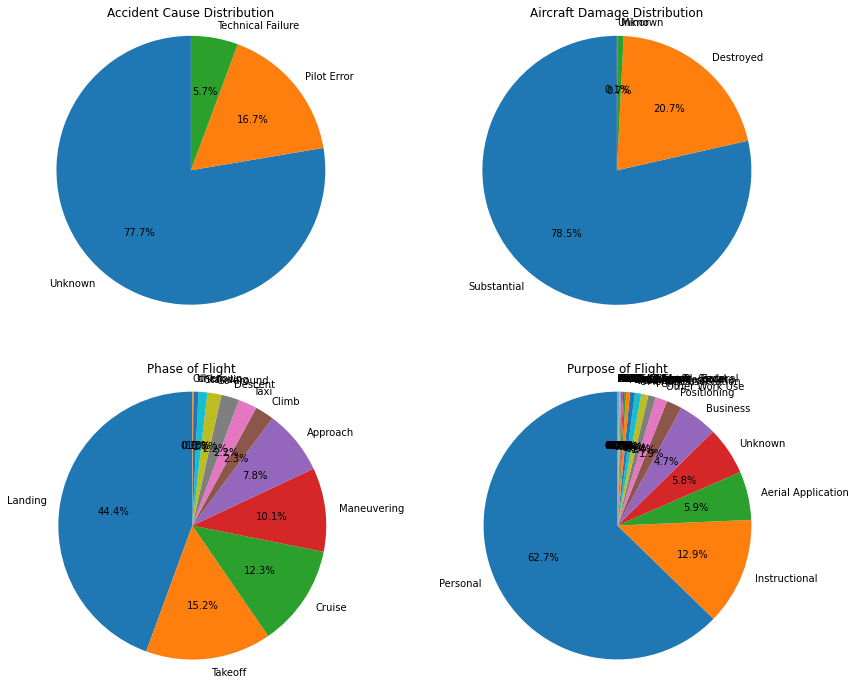

In [72]:
# Accident cause, extent of damage,phase of flight and purpose
import matplotlib.pyplot as plt

Accident_Cause = data['AccidentCause'].value_counts()
Damage = data['AircraftDamage'].value_counts()
PhaseofFlight = data['BroadPhaseOfFlight'].value_counts()
Purposeofflight = data['PurposeOfFlight'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
ax1, ax2, ax3, ax4 = axes.flatten()


ax1.pie(Accident_Cause, labels=Accident_Cause.index, autopct='%.1f%%', startangle=90)
ax1.set_title('Accident Cause Distribution')
ax1.axis('equal')

ax2.pie(Damage, labels=Damage.index, autopct='%.1f%%', startangle=90)
ax2.set_title('Aircraft Damage Distribution')
ax2.axis('equal')

ax3.pie(PhaseofFlight, labels=PhaseofFlight.index, autopct='%.1f%%', startangle=90)
ax3.set_title('Phase of Flight')
ax3.axis('equal')

ax4.pie(Purposeofflight, labels=Purposeofflight.index, autopct='%.1f%%', startangle=90)
ax4.set_title('Purpose of Flight')
ax4.axis('equal')


plt.show()



The data indicate that the cause of most accidents has not been indicate(Probable Cause). For those that were analyzed and summarized in the report status, a majority were caused by pilot error and not technical faults. This is not surprising. "In 2020, the National Transportation Safety Board found that “69.1% of all general aviation accidents in 2020 were caused by pilot error.”  

In nearly all the accidents the aircraft suffered substantial damage or was completely destroyed.

Most accidents happened during Landing, followed by Take off. Peronal purpose flights were the leading cuse of accidents

###  6.2 Bivariate Data Analysis

In order to sharpen the analysis, I will use a new data set that only includes the top 10 makes. In this analysis, I will observe the relation between make of the aircraft and:-

##### Fatal and Serious Injuries

##### Survival Rates





In [73]:
# Get the top 10 makes based on frequency
top_10_makes = data['Make'].value_counts().nlargest(10).index

# Filter the dataframe to only include rows with the top 10 makes and create a new dataframe
data2 = data[data['Make'].isin(top_10_makes)]
data2

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
0,1982-01-01,United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Unknown,Washington,1.0,1982
1,1982-01-01,United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Unknown,New Jersey,1.0,1982
3,1982-01-01,United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Unknown,New Mexico,1.0,1982
4,1982-01-01,United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Unknown,Alabama,1.0,1982
5,1982-01-02,United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Unknown,Louisiana,1.0,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78655,2022-12-16,United States,Non-Fatal,Substantial,Cessna,R172K,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Unknown,Florida,1.0,2022
78657,2022-12-18,United States,Non-Fatal,Substantial,Piper,PA28,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Landing,Unknown,Arizona,1.0,2022
78658,2022-12-21,United States,Non-Fatal,Substantial,Cessna,172F,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Unknown,Michigan,1.0,2022
78660,2022-12-26,United States,Non-Fatal,Substantial,Piper,PA-28-151,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Unknown,Maryland,1.0,2022


In [74]:
data2.columns

Index(['EventDate', 'Country', 'InjurySeverity', 'AircraftDamage', 'Make',
       'Model', 'AmateurBuilt', 'NumberOfEngines', 'EngineType',
       'PurposeOfFlight', 'TotalFatalInjuries', 'TotalSeriousInjuries',
       'TotalMinorInjuries', 'TotalUninjured', 'WeatherCondition',
       'BroadPhaseOfFlight', 'AccidentCause', 'State', 'SurvivalRate',
       'EventYear'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

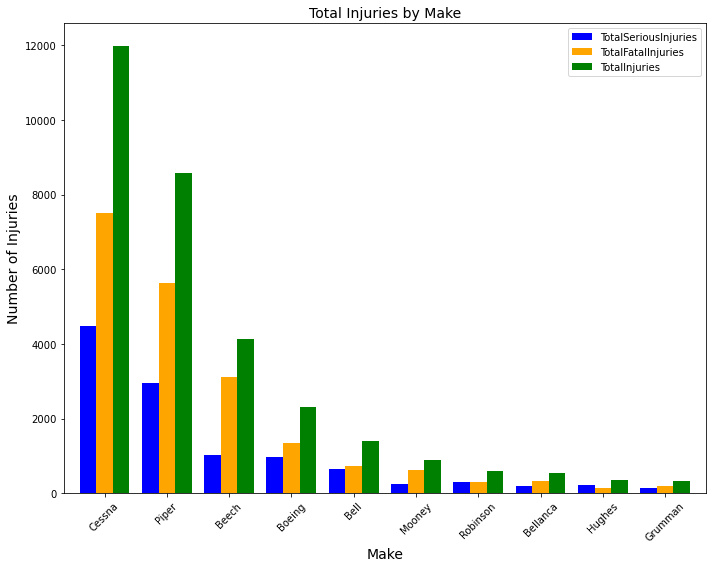

In [75]:
# Relationship between Make and the number of serious injuries and Fatalities

# Group by 'Make' and sum the total injuries
grp2 = data2.groupby('Make')[['TotalSeriousInjuries', 'TotalFatalInjuries']].sum()

# Calculate total injuries by adding serious and fatal injuries
grp2['TotalInjuries'] = grp2['TotalSeriousInjuries'] + grp2['TotalFatalInjuries']

# Sort by total injuries and keep the top ten makes
grp2 = grp2.sort_values('TotalInjuries', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 8))

grp2[['TotalSeriousInjuries', 'TotalFatalInjuries', 'TotalInjuries']].plot(
    kind='bar',  width=0.8,   color=['blue', 'orange', 'green'],  figsize=(10, 8))

plt.title('Total Injuries by Make',fontsize=14)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

Cessna, Piper and Beech are leading in the number of injuries. As we have seen above, they also have the most accidents recorded.

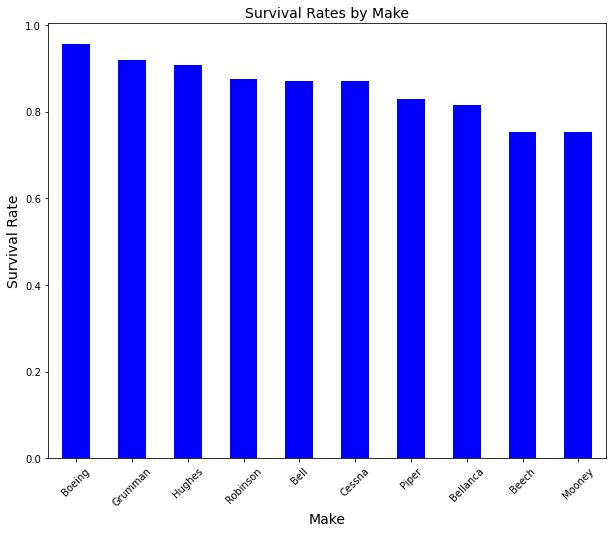

In [76]:
grp3 = data2.groupby('Make')['SurvivalRate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))

grp3.plot(kind='bar',color=['blue']);
plt.title('Survival Rates by Make',fontsize=14);
plt.xlabel('Make',fontsize=14)
plt.ylabel('Survival Rate',fontsize=14)
plt.xticks(rotation=45)
plt.show();

The survival rate reduces the bias from the number of accidents and the no, of passengers that an aircraft can hold. From this analysis, the survival rate is highest for Boeing.

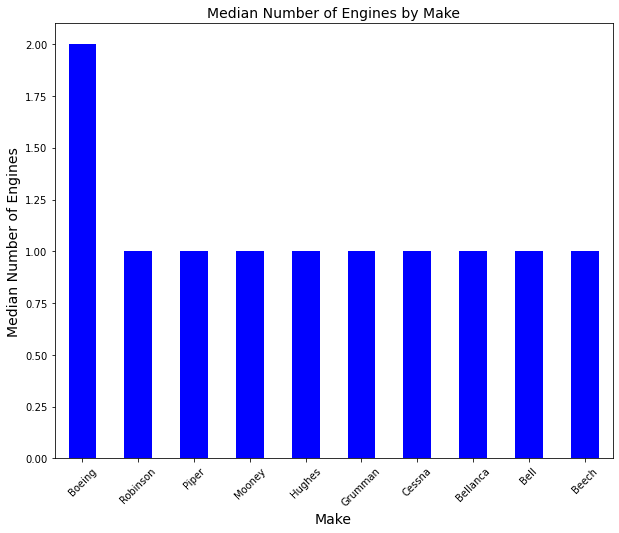

In [77]:
grp4 = data2.groupby('Make')['NumberOfEngines'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 8))

grp4.plot(kind='bar',color=['blue']);

plt.title('Median Number of Engines by Make',fontsize=14)
plt.xlabel('Make',fontsize=14)
plt.ylabel('Median Number of Engines',fontsize=14)
plt.xticks(rotation=45)
plt.show();


### 6.3 Multivariate Analysis

In this analysis, I will look into the relationship between multiple factors using the correlation of all numerical columns. This helps to see at a glance how different factors relate with each other.

In [78]:
# show the correlation of numeric columns with each other 
data_num = data.select_dtypes(['int','float'])
data_num.head()


,NumberOfEngines,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,SurvivalRate
0,1.0,0.0,0.0,0.0,2.0,1.0
1,2.0,0.0,0.0,0.0,2.0,1.0
2,1.0,0.0,0.0,3.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0


In [79]:

# subset the numeical columns
data_int = data[['NumberOfEngines','TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries',
                 'TotalUninjured','SurvivalRate']]

In [80]:
corr = data_num.corr()
corr

,NumberOfEngines,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,SurvivalRate
NumberOfEngines,1.000000,0.107323,0.065406,0.102283,0.313050,-0.064897
TotalFatalInjuries,0.107323,1.000000,0.123219,0.080170,-0.019069,-0.338598
TotalSeriousInjuries,0.065406,0.123219,1.000000,0.326473,0.066378,0.061041
TotalMinorInjuries,0.102283,0.080170,0.326473,1.000000,0.168239,0.090786
TotalUninjured,0.313050,-0.019069,0.066378,0.168239,1.000000,0.070502
SurvivalRate,-0.064897,-0.338598,0.061041,0.090786,0.070502,1.000000


<AxesSubplot:>

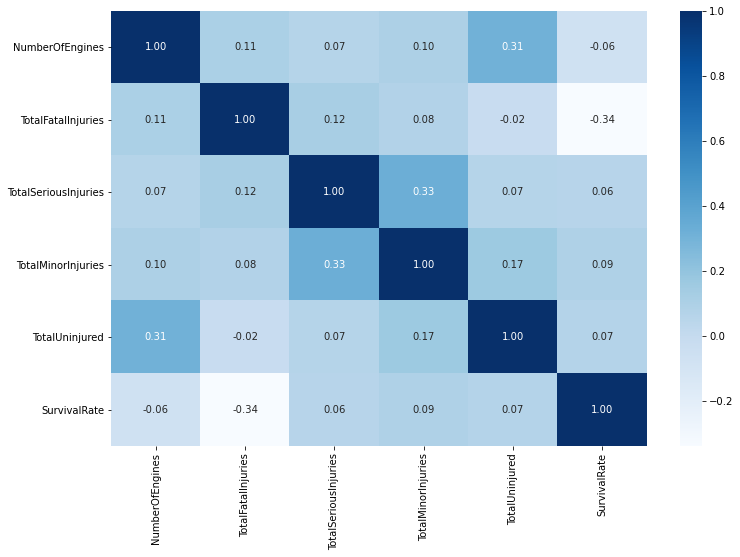

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f',cmap="Blues")

**Total Fata Injuries** have the strongest impact on reducing survival rates

**Number of Engines** is positively correlated with the number of uninjured individuals, meaning more engines might contribute to lower injury counts, but does not significantly impacy survival rates

**Total Serious and Minor Injuries** are correlated showing accidents especially in terms of survival

### 7.0 Determining the Safest Make and Model

In [82]:
# Of the top 10 makes, Cessna, Piper and Beech have by far the worst safety record with Boeing, Hughes and Robinson and Grummann
# being the safest
# I will create a new data frame that includes the 4 types of safest aircraft for further analysis of the safest Make and Models
Safest_Makes =data2['Make'].value_counts().nsmallest(4).index

# Filter the dataframe to only include rows with the safest 3 makes
data3 = data2[data2['Make'].isin(Safest_Makes)]
data3.head()

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
5,1982-01-02,United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Unknown,Louisiana,1.000000,1982
16,1982-01-03,United States,Fatal,Destroyed,Grumman,AA-5B,No,1.0,Reciprocating,Personal,2.0,1.0,0.0,0.0,IMC,Descent,Unknown,California,0.333333,1982
21,1982-01-03,United States,Non-Fatal,Substantial,Bellanca,7GCBC,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Maneuvering,Unknown,California,1.000000,1982
40,1982-01-06,United States,Non-Fatal,Substantial,Boeing,A75,No,1.0,Reciprocating,Unknown,0.0,1.0,0.0,1.0,IMC,Cruise,Unknown,California,1.000000,1982
70,1982-01-13,United States,Non-Fatal,Destroyed,Grumman,AA5B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Descent,Unknown,Florida,1.000000,1982


In [83]:
data3['Make'].value_counts()

Grumman     1063
Bellanca    1034
Boeing       915
Hughes       864
Name: Make, dtype: int64

In [84]:
#Create a cross tab with Make against Engines
engine_No = pd.crosstab(data3['Make'],data3['NumberOfEngines'])
engine_No

NumberOfEngines,1.0,2.0,3.0,4.0
Make,,,,
Bellanca,1034,0,0,0
Boeing,388,372,84,71
Grumman,999,64,0,0
Hughes,864,0,0,0


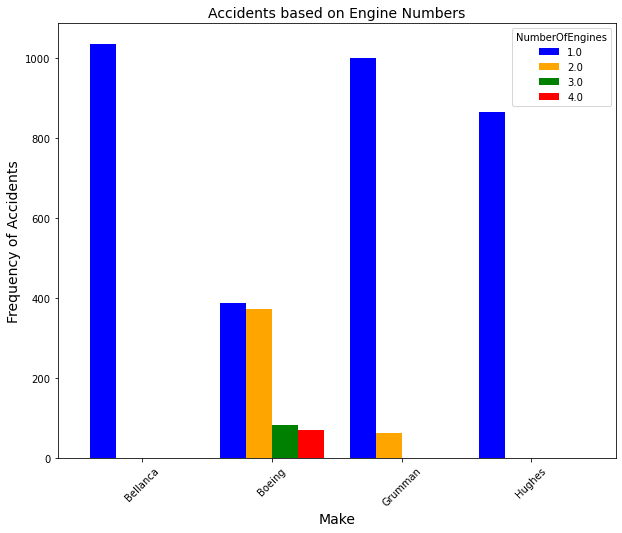

In [85]:

# Plotting
engine_No.plot(kind='bar',width=0.8,   color=['blue', 'orange', 'green','red'],  figsize=(10, 8))

plt.title('Accidents based on Engine Numbers',fontsize=14)
plt.xlabel('Make',fontsize=14)
plt.ylabel('Frequency of Accidents',fontsize=14)
plt.xticks(rotation=45)
plt.show();


Of the 4 makes with the least accidents Boeing is the only make that has 3 engines and above; The frequency of accidents for 3 and more engines is the lowest. I can conclude that the safest make is Boeing for the models that 3 or more engines. We will therefore now analyze the models of Boeing that meet this criteria.

In [86]:
# Create a new dataframe with just Boeing values so that we can filter out the safest models of Boeing

Boeing =data3['Make'].value_counts().index[2]
Boeing


'Boeing'

In [87]:
# Filter the dataframe to only include rows with Boeing
data4 = data3[data3['Make'] == 'Boeing']
data4

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
40,1982-01-06,United States,Non-Fatal,Substantial,Boeing,A75,No,1.0,Reciprocating,Unknown,0.0,1.0,0.0,1.0,IMC,Cruise,Unknown,California,1.000000,1982
71,1982-01-13,United States,Fatal,Destroyed,Boeing,737-222,No,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff,Unknown,Washington DC,0.103448,1982
223,1982-02-06,United States,Non-Fatal,Minor,Boeing,A75N1,No,1.0,Reciprocating,Aerial Application,0.0,0.0,0.0,3.0,VMC,Taxi,Unknown,Oregon,1.000000,1982
319,1982-02-17,United States,Non-Fatal,Substantial,Boeing,727-235,No,3.0,Turbo Fan,Unknown,0.0,1.0,1.0,51.0,VMC,Takeoff,Unknown,Florida,1.000000,1982
509,1982-03-13,United States,Fatal,Destroyed,Boeing,KC-135A,No,4.0,Turbo Jet,Unknown,6.0,0.0,0.0,0.0,UNK,Approach,Unknown,Arizona,0.000000,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78507,2022-10-15,United States,Non-Fatal,Substantial,Boeing,A75N1(PT17),No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Unknown,California,1.000000,2022
78539,2022-10-26,United States,Non-Fatal,Substantial,Boeing,A75N1(PT17),No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Landing,Unknown,California,1.000000,2022
78574,2022-11-10,United States,Non-Fatal,Substantial,Boeing,737-8,No,2.0,Reciprocating,Personal,0.0,0.0,1.0,147.0,VMC,Landing,Unknown,Florida,1.000000,2022
78579,2022-11-12,United States,Fatal,Destroyed,Boeing,B17,No,4.0,Reciprocating,ASHO,6.0,0.0,0.0,0.0,VMC,Landing,Unknown,Texas,0.000000,2022


In [88]:
# Filter out models with greater than 3 engines - We have determined these are the safest.
data5 = data4.loc[data4['NumberOfEngines']>=3]
data5

,EventDate,Country,InjurySeverity,AircraftDamage,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,AccidentCause,State,SurvivalRate,EventYear
319,1982-02-17,United States,Non-Fatal,Substantial,Boeing,727-235,No,3.0,Turbo Fan,Unknown,0.0,1.0,1.0,51.0,VMC,Takeoff,Unknown,Florida,1.000000,1982
509,1982-03-13,United States,Fatal,Destroyed,Boeing,KC-135A,No,4.0,Turbo Jet,Unknown,6.0,0.0,0.0,0.0,UNK,Approach,Unknown,Arizona,0.000000,1982
613,1982-03-24,United States,Non-Fatal,Substantial,Boeing,707-123B,No,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,VMC,Landing,Unknown,Arizona,1.000000,1982
827,1982-04-18,United States,Non-Fatal,Substantial,Boeing,727-200,No,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,68.0,VMC,Landing,Unknown,Texas,1.000000,1982
1741,1982-07-09,United States,Fatal,Destroyed,Boeing,727-235,No,3.0,Turbo Fan,Unknown,153.0,9.0,0.0,7.0,VMC,Takeoff,Unknown,Louisiana,0.094675,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65254,2012-05-30,United States,Non-Fatal,Minor,Boeing,747,No,4.0,Turbo Fan,Personal,0.0,0.0,0.0,24.0,VMC,Landing,Technical Failure,Illinois,1.000000,2012
74003,2019-01-29,United States,Non-Fatal,Substantial,Boeing,727 200,No,3.0,Turbo Fan,Personal,0.0,0.0,0.0,4.0,VMC,Landing,Technical Failure,Alabama,1.000000,2019
74964,2019-10-02,United States,Fatal,Destroyed,Boeing,B17,No,4.0,Reciprocating,Other Work Use,7.0,1.0,5.0,0.0,VMC,Landing,Pilot Error,Connecticut,0.461538,2019
77436,2021-11-29,United States,Non-Fatal,Substantial,Boeing,747-4B5F,No,4.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Landing,Unknown,Florida,1.000000,2021


In [89]:
data5['Model'].value_counts().index

Index(['727-200', '727', '747-400', '727-232', '727-224', '727-223', '747-422',
       '707-323C', '747-122', '747-136', '727-225', '727-222', '727-264',
       '727-100', '747', '727-235', '707-321B', '727-227', 'B-17G', 'B17',
       '727-214', '747-200', '747-121', '727-31', '727-251', '727-233',
       '747-300', '727-281', '747-131', '747-228F', 'S-307', '727-247',
       '747-243B', '747SP', '747-269B', '727-23', '727-225A', '747-287B',
       'MD-11', '747-128', '747-SP', '747-368', '727-243', '747 SP-09',
       '747-236B', '727-225B', '727 200', '747-200B', 'HP-B-377', 'DC-10',
       '727-222A', '747-238', '747-212B', '747-256', '747-4B5F', '707-123B',
       '747-259B', '747SP-21', '747-238B', '727-2M7', '747-230', '727-295',
       '727-51C', 'MD-10-10F', '727-212', '747-200F', '747-236', 'B747-433BCF',
       '707-351C', '707-324C', '727-230', '747-4F6B', '707-300', '727-2S2F',
       '727-100QC', 'KC-135A'],
      dtype='object')

In [90]:
# create a copy of the dataframe before subsetting
data6 = data5.copy()

In [91]:
data6['Model1']=data5['Model'].str[:3]

In [92]:
Boeing_Accidents = data6['Model1'].value_counts()
Boeing_Accidents

727    81
747    51
707    11
B-1     3
MD-     2
B17     2
S-3     1
KC-     1
DC-     1
B74     1
HP-     1
Name: Model1, dtype: int64

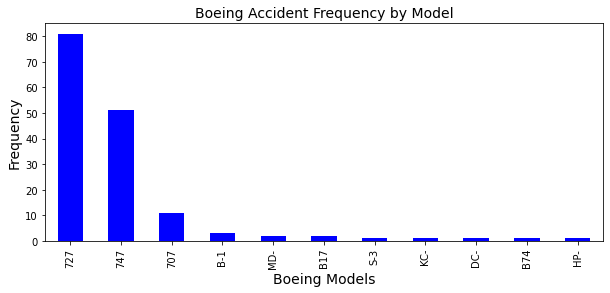

In [93]:
Boeing_Accidents = data6['Model1'].value_counts()

plt.figure(figsize=(10,4))
plt.xlabel('Boeing Models',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Boeing Accident Frequency by Model',fontsize=14)
plt.xticks(rotation=45)
Boeing_Accidents.plot(kind='bar',color='b');
plt.show()

Boeing has 3 main models with greater than 3 engines; the other models seem to be outliers. Of the 3 main models the Boeing 707 has the least occurence of accidents.

<Figure size 720x576 with 0 Axes>

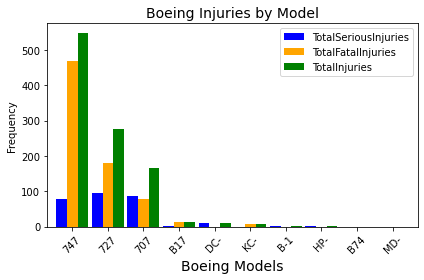

In [94]:
grp4 = data6.groupby('Model1')[['TotalSeriousInjuries', 'TotalFatalInjuries']].sum()
grp4['TotalInjuries'] = grp4['TotalSeriousInjuries'] + grp4['TotalFatalInjuries']
grp4 = grp4.sort_values('TotalInjuries', ascending=False).head(10)

plt.figure(figsize=(10, 8))
grp4[['TotalSeriousInjuries', 'TotalFatalInjuries','TotalInjuries']].plot(kind='bar', width=0.9, 
color=['blue', 'orange','green'])
plt.title('Boeing Injuries by Model',fontsize=14);
plt.xlabel('Boeing Models',fontsize=14)
plt.ylabel('Frequency')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show();

The main Boeing Models are the 747, 727, and the 707. The other models are outliers. From the analysis, the Boeing 707 resulted in the least injuries.

However, comparing the number Boeing's  accidents for models with 3 engines and above(155) with the total accidents in the AviationData_Clean (over 78K), it is correct to say that Boeing Models are overall saf and the company should consider Boeing as the make and chose the above models based on the level of usage e.g. no. of passengers, distance covered, maintenance costs etc.

In [95]:
Boeing_Accidents = data6['Model1'].value_counts().sum()
Boeing_Accidents

155